In [29]:
def getCompCycles(composition):
    """Return a list of a composition's cyclic forms."""
    comp = list(composition)
    cycleList = [copy(tuple(comp))]
    for i in range(len(comp)-1):
        top = comp.pop(0)
        comp.append(top)
        cycleList.append(copy(tuple(comp)))
    return sorted(cycleList)
    
def getUniqueCompositionCycles(n, k=3):
    """Return a list of unique (up to rotation) k-compositions of [n].
    
    Keyword arguments:
    n -- the size of the integer set
    k -- the length of the composition (default 3)
    """
    compositions = Compositions(n, length=k)
    uniqueComps = []
    compCycleList = []
    for comp in compositions:
        if tuple(comp) in compCycleList:
            continue
        else:
            compCycles = getCompCycles(comp)
            uniqueComps.append(compCycles[0])
            compCycleList.extend(compCycles)
    return sorted(uniqueComps)

def makeGraphDict(vertices, distance):
    """Return a dictionary of vertex-neighbor pairs.
    
    Keyword arguments:
    vertices -- a list of tuples
    distance -- the desired Hamming distance between adjacent vertices
    """
    graphDict = dict()
    k = len(vertices[0])
    for v in vertices:
        edges = [u for u in vertices if len(set(u).intersection(set(v))) == k-distance]
        graphDict[v] = edges
    return graphDict

def createHammingGraph(comp, distance):
    """Return the distance-d Hamming graph constructed from a composition.
    
    Keyword arguments:
    comp -- the consecutive difference sequence that defines the vertices
    distance -- the desired Hamming distance between adjacent vertices
    """
    compList = list(copy(comp))
    n = sum(compList)
    vertices = []
    setVertices = []
    for i in range(0,n):
        newVertex = (i, (i+compList[0])%n, (i+compList[0]+compList[1])%n)
        if set(newVertex) not in setVertices:
            vertices.append(newVertex)
            setVertices.append(set(newVertex))
    graphDict = makeGraphDict(vertices, distance)
    return Graph(graphDict)

def makeGraphListWithDistance(compList, distance):
    """Return a list of Hamming graphs given a list of compositions.
    
    Keyword arguments:
    compList -- a list of rotation-invariant compositions
    distance -- the desired Hamming distance between adjacent vertices
    """
    graphList = []
    for comp in compList:
        G = createHammingGraph(comp, distance)
        graphList.append(G)
    return graphList

def displayHammingGraphsWithDistance(n, k, d):
    """Print all rotationally-unique (n,k) compositions and their d-Hamming graphs.
    
    Keyword arguments:
    n -- integer set size
    k -- composition length
    d -- the desired Hamming distance between adjacent vertices
    """
    print(f'Generating Hamming Graphs for n={n}, k={k}, distance={d}, lambda={k-d}...')
    compList = getUniqueCompositionCycles(n, k)
    graphList = makeGraphListWithDistance(compList, d)
    for (graph, comp) in zip(graphList, compList):
        print(f'Consecutive difference sequence {comp} with distance={d}, lambda={k-d}:')
        graph.show(layout='circular')

def displayHammingGraphs(n, k):
    """Print all rotationally-unique (n,k) compositions and their Hamming graphs, 
    iterating through the distances 1 <= d < k.
    
    Keyword arguments:
    n -- integer set size
    k -- composition length
    """
    print(f'Generating Hamming Graphs for n={n}, k={k}...')
    compList = getUniqueCompositionCycles(n, k)
    for d in range(1, k+1):
        graphList = makeGraphListWithDistance(compList, d)
        for (graph, comp) in zip(graphList, compList):
            print(f'Consecutive difference sequence {comp} with distance={d}, lambda={k-d}:')
            graph.show(layout='circular')

def getCompGraphTupleList(n, k, d):
    """Return a list of composition-graph tuples.
    
    Keyword arguments:
    n -- integer set size
    k -- composition length
    d -- Hamming distance for graph construction
    """
    compList = getUniqueCompositionCycles(n, k)
    graphList = makeGraphListWithDistance(compList, d)
    tupleList = [(C, G) for C, G in zip(compList, graphList)]
    return tupleList

def getHammingIsomorphismClasses(n, k, d):
    """Return a list of isomorphism classes, as lists of compositions 
    that produce isomorphic distance-d Hamming graphs, with a 
    representative graph at index 0 of each list.
    
    Keyword arguments:
    n -- integer set size
    k -- composition length
    d -- Hamming distance for graph construction
    """
    CGList = getCompGraphTupleList(n, k, d)
    indicesToCheck = [i for i in range(0, len(CGList))]
    isoClasses = []
    while len(indicesToCheck) > 0:
        index = indicesToCheck[0]
        isoIndices = [index]
        comp, graph = CGList[index]
        isoClass = [graph, comp]
        for j in indicesToCheck:
            if j <= index:
                continue
            graph2 = CGList[j][1]
            if graph.is_isomorphic(graph2):
                isoIndices.append(j)
                isoClass.append(CGList[j][0])
        for isoIndex in isoIndices:
            indicesToCheck.remove(isoIndex)
        isoClasses.append(isoClass)
    return isoClasses

def displayHammingIsomorphismClasses(n, k, d):
    """Print all rotationally-unique (n,k) compositions with isomorphic distance-d 
    Hamming graphs, along with a representative graph for each isomorphism class 
    and various graph properties associated with that class.
    
    Keyword arguments:
    n -- integer set size
    k -- composition length
    d -- the desired Hamming distance between adjacent vertices
    """
    print(f'Generating isomorphism classes of {n, k} Hamming Graphs with distance {d}...')
    isoClasses = getHammingIsomorphismClasses(n, k, d)
    print(f'Found {len(isoClasses)} unique graphs up to isomorphism.')
    for isoClass in isoClasses:
        print(f'Isomorphic compositions: {isoClass[1:]}')
        repGraph = isoClass[0]
        print(f'Representative distance-{d} graph of order {repGraph.order()}:')
        # various graph properties that may be interesting. Comment out as needed.
        complete = repGraph.is_clique()
        cyclic = repGraph.is_cycle()
        connected = repGraph.is_connected()
        empty = repGraph.size() == 0
        hamiltonian = repGraph.is_hamiltonian()
        print(f'Complete={complete}, Cyclic={cyclic}, Connected={connected}, Empty={empty}, Hamiltonian={hamiltonian}.')
        isoClass[0].show(layout='circular')

def findIsomorphicHammingGraphs(start=14, end=14, k=3):
    """Print all rotationally-unique (n,k) compositions with isomorphic distance-d 
    Hamming graphs, along with a representative graph for each isomorphism class, 
    iterating over n in [start, end].
    
    Keyword arguments:
    start -- starting value of n (default 4)
    end -- the final value of n to be searched (default 20)
    k -- composition length (default 3)
    """
    for n in range(max(k, start), end+1):
        #if n in Primes():
        for i in range(0,k):
            displayHammingIsomorphismClasses(n,k,k-i)
            


#

Generating isomorphism classes of (14, 3) Hamming Graphs with distance 3...
Found 6 unique graphs up to isomorphism.
Isomorphic compositions: [(1, 1, 12), (3, 3, 8), (4, 5, 5)]
Representative distance-3 graph of order 14:
Complete=False, Cyclic=False, Connected=True, Empty=False, Hamiltonian=True.


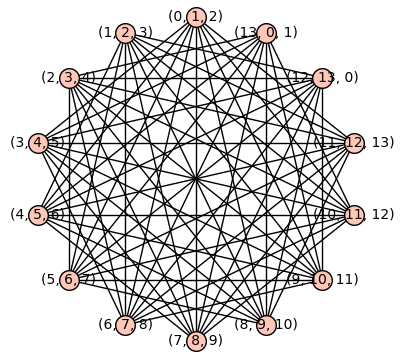

Isomorphic compositions: [(1, 2, 11), (1, 4, 9), (1, 9, 4), (1, 11, 2), (3, 5, 6), (3, 6, 5)]
Representative distance-3 graph of order 14:
Complete=False, Cyclic=False, Connected=True, Empty=False, Hamiltonian=True.


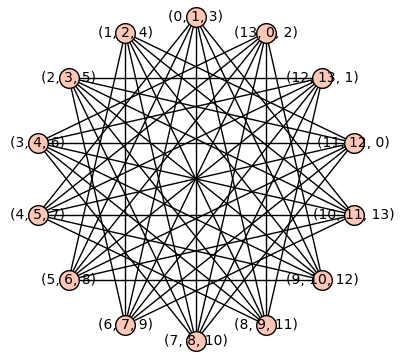

Isomorphic compositions: [(1, 3, 10), (1, 5, 8), (1, 8, 5), (1, 10, 3), (2, 3, 9), (2, 9, 3)]
Representative distance-3 graph of order 14:
Complete=False, Cyclic=False, Connected=True, Empty=False, Hamiltonian=True.


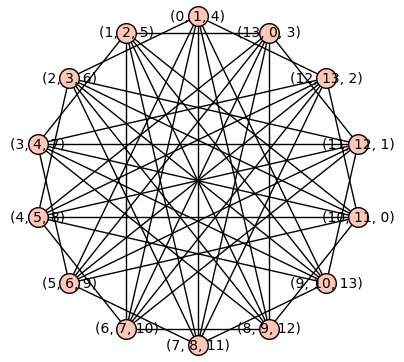

Isomorphic compositions: [(1, 6, 7), (1, 7, 6), (2, 5, 7), (2, 7, 5), (3, 4, 7), (3, 7, 4)]
Representative distance-3 graph of order 14:
Complete=False, Cyclic=False, Connected=True, Empty=False, Hamiltonian=True.


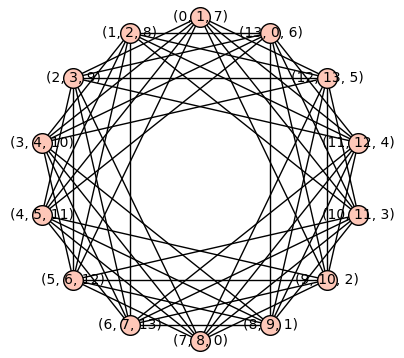

Isomorphic compositions: [(2, 2, 10), (2, 6, 6), (4, 4, 6)]
Representative distance-3 graph of order 14:
Complete=False, Cyclic=False, Connected=True, Empty=False, Hamiltonian=True.


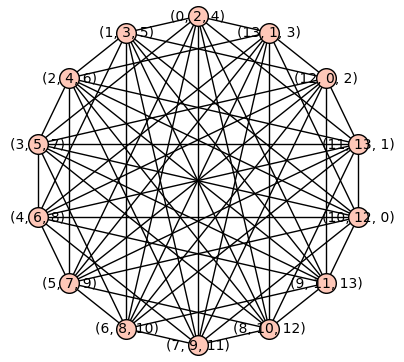

Isomorphic compositions: [(2, 4, 8), (2, 8, 4)]
Representative distance-3 graph of order 14:
Complete=False, Cyclic=False, Connected=True, Empty=False, Hamiltonian=True.


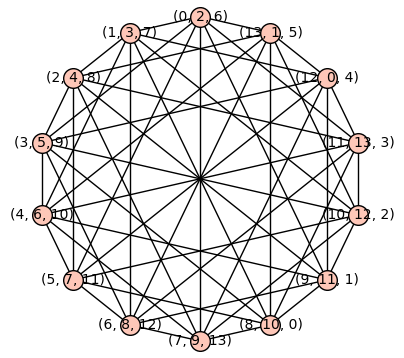

Generating isomorphism classes of (14, 3) Hamming Graphs with distance 2...
Found 5 unique graphs up to isomorphism.
Isomorphic compositions: [(1, 1, 12), (2, 2, 10), (2, 6, 6), (3, 3, 8), (4, 4, 6), (4, 5, 5)]
Representative distance-2 graph of order 14:
Complete=False, Cyclic=False, Connected=False, Empty=False, Hamiltonian=False.


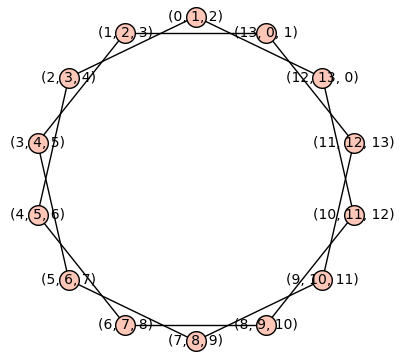

Isomorphic compositions: [(1, 2, 11), (1, 4, 9), (1, 9, 4), (1, 11, 2), (3, 5, 6), (3, 6, 5)]
Representative distance-2 graph of order 14:
Complete=False, Cyclic=False, Connected=True, Empty=False, Hamiltonian=True.


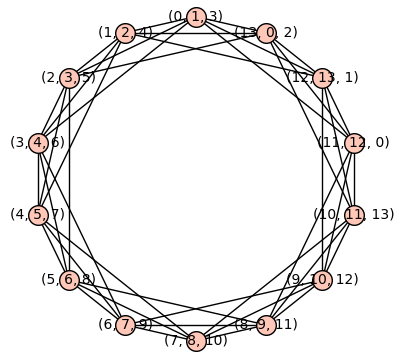

Isomorphic compositions: [(1, 3, 10), (1, 5, 8), (1, 8, 5), (1, 10, 3), (2, 3, 9), (2, 9, 3)]
Representative distance-2 graph of order 14:
Complete=False, Cyclic=False, Connected=True, Empty=False, Hamiltonian=True.


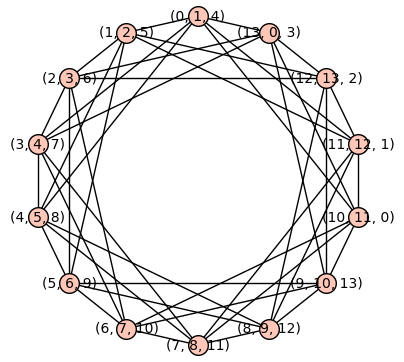

Isomorphic compositions: [(1, 6, 7), (1, 7, 6), (2, 5, 7), (2, 7, 5), (3, 4, 7), (3, 7, 4)]
Representative distance-2 graph of order 14:
Complete=False, Cyclic=False, Connected=True, Empty=False, Hamiltonian=True.


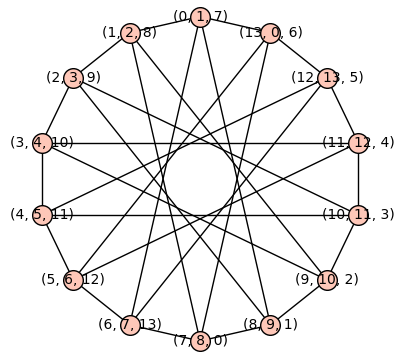

Isomorphic compositions: [(2, 4, 8), (2, 8, 4)]
Representative distance-2 graph of order 14:
Complete=False, Cyclic=False, Connected=False, Empty=False, Hamiltonian=False.


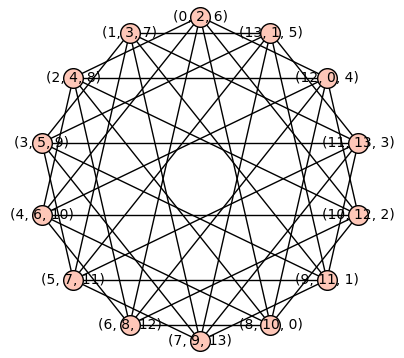

Generating isomorphism classes of (14, 3) Hamming Graphs with distance 1...
Found 4 unique graphs up to isomorphism.
Isomorphic compositions: [(1, 1, 12), (3, 3, 8), (4, 5, 5)]
Representative distance-1 graph of order 14:
Complete=False, Cyclic=True, Connected=True, Empty=False, Hamiltonian=True.


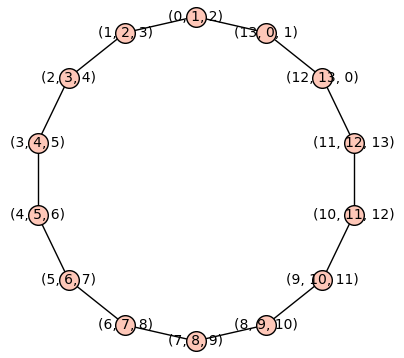

Isomorphic compositions: [(1, 2, 11), (1, 3, 10), (1, 4, 9), (1, 5, 8), (1, 8, 5), (1, 9, 4), (1, 10, 3), (1, 11, 2), (2, 3, 9), (2, 4, 8), (2, 8, 4), (2, 9, 3), (3, 5, 6), (3, 6, 5)]
Representative distance-1 graph of order 14:
Complete=False, Cyclic=False, Connected=False, Empty=True, Hamiltonian=False.


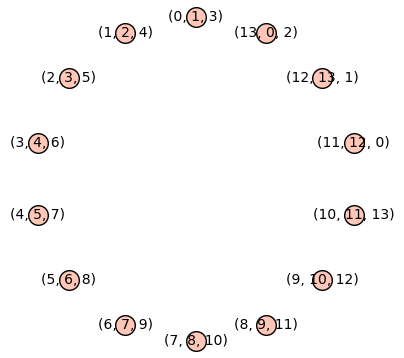

Isomorphic compositions: [(1, 6, 7), (1, 7, 6), (2, 5, 7), (2, 7, 5), (3, 4, 7), (3, 7, 4)]
Representative distance-1 graph of order 14:
Complete=False, Cyclic=False, Connected=False, Empty=False, Hamiltonian=False.


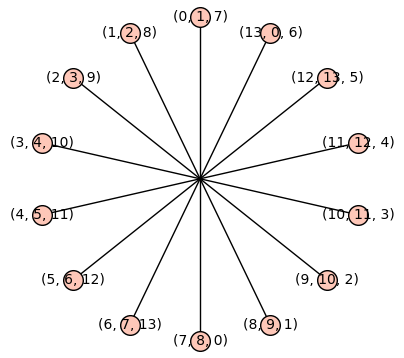

Isomorphic compositions: [(2, 2, 10), (2, 6, 6), (4, 4, 6)]
Representative distance-1 graph of order 14:
Complete=False, Cyclic=False, Connected=False, Empty=False, Hamiltonian=False.


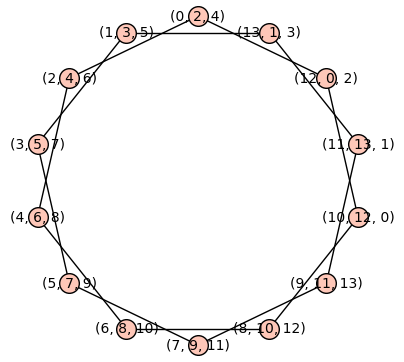

In [30]:
findIsomorphicHammingGraphs(end=14)